# Homework 1 
This assignment involves classifying heart disease from indicating features of an individual patient. This dataset includes various features corresponding to an indicator HeartDisease in which 0 indicates no heart disease and 1 indicates heart disease.

First load up the dataset and explore it using various pandas tools (some helpful tips [here](https://towardsdatascience.com/data-exploration-101-with-pandas-e059d0661313)). After exploring the dataset we will try to predict whether or not a patient has heart disease. The third question will ask you to train a decision tree classifier on the dataset and report some results. We will be using common python libraries included in the sklearn package to do most of the work for us here. Later we will delve into how these packages work, but for this introductory assignment we can use these functions as a black box.

In [1]:
# Imports
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree 

In [2]:
# Load the heart disease dataset:
dataframe = pd.read_csv("../data/heart.csv")
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Question 1: Data Exploration Questions**
* Question 1.1: How many positive examples of heart disease are in this dataset? 
* Question 1.2: How many negative examples (no heart disease) are in this dataset?
* Question 1.3: What is the average age for subjects in this dataset?
* Question 1.4: Which variable is most positively correlated with heart disease?
* Question 1.5: Which variable is most negatively correlated with heart disease?
* Question 1.6: How much does Age correlate with Max Heart Rate (MaxHR)?

In [3]:
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[['Age']]

# y variable is the target label we want to predict.
y = dataframe['HeartDisease']

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
def predict_heart_disease_from_age(age: int) -> int:
    return int(age > 100)
predicted_y = [predict_heart_disease_from_age(a) for a in X['Age']]
accuracy = accuracy_score(predicted_y, y)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

The predict_heart_disease_from_age accurately classifies 44.66% of examples


**Question 2: Manual Classifier**
How would we manually create a function to solve this task for us? Try it.
* Question 2.1: The function predict_heart_disease_from_age only predicts indivduals above 100 years old will have heart disease. This won't match any examples in the dataset, but still achieves 44.66% accuracy. Why is that?
* Question 2.2: Try to make the best predict_heart_disease_from_age function you can. What is the best value to split at? How do you pick this? Please include the train and test accuracy.

In [5]:
# Train a decision tree with max_depth 1.
classifier = tree.DecisionTreeClassifier(max_depth=1)
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

The classifier accurately classifies 66.04% of train examples
The classifier accurately classifies 58.33% of test examples


[Text(167.4, 163.07999999999998, 'Age <= 54.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(83.7, 54.360000000000014, 'gini = 0.471\nsamples = 332\nvalue = [206, 126]\nclass = 0'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.417\nsamples = 310\nvalue = [92, 218]\nclass = 1')]

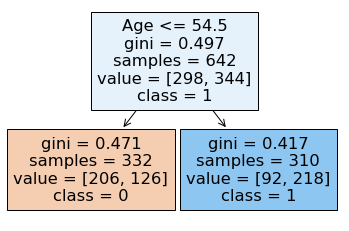

In [6]:
# Visualize the tree
viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
# Alternatively, visualize the tree using dtreeviz package
#from dtreeviz.trees import dtreeviz
#viz = treeviz(clf, X, y, target_name="y", feature_names=X.columns, class_names=list(['0', '1']))
viz

**Question 3: Training Decision Trees**
* Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree. 
* Question 3.2: Discuss how various features affect the performance of the model.
* Question 3.3: Experiment with the max_depth hyperparementer parameter to DecisionTreeClassifier. How does that affect the results? Report train-accuracy and test-accuracy for various values of max_depth.
* Question 3.4: Why might the train-accuracy and test-accuracy differ? 

**Submitting this assignment:**
Please submit the notebook via Blackboard as a *.ipynb file: Please include output of the notebook cells (i.e. do not clear output). Download the file via File->Download As->Notebook (.ipynb).